In [41]:
# ------------------ IMPORTS ------------------
import pandas as pd
import numpy as np

## Data Preprocessing and Feature Engineering

In [42]:
# ------------------ LOAD & CLEAN DATA ------------------
data=pd.read_csv(r"C:\Users\CLARA\Downloads\Final Graduation Project\Final Graduation Project\Hypertension-risk-model-main.csv")
data

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [44]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.310613
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.462799
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [45]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

### Handling Missing Values

In [46]:
# For cigsPerDay
data['cigsPerDay'] = data.apply(
    lambda row: 0 if row['currentSmoker'] == 0 
    else row['cigsPerDay'], axis=1)
data['cigsPerDay'].fillna(data['cigsPerDay'].median(), inplace=True)

# For BPMeds
data['BPMeds'].fillna(0, inplace=True)  

# For totChol and BMI
for col in ['totChol', 'BMI']:
    data[col].fillna(data[col].median(), inplace=True)

# For heartRate
data = data.dropna(subset=['heartRate'])

# Fill NaN values in 'glucose' with the median of the respective 'diabetes' group
data['glucose'] = data.groupby('diabetes')['glucose'].transform(lambda x: x.fillna(x.median()))

C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\260286332.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cigsPerDay'].fillna(data['cigsPerDay'].median(), inplace=True)
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\260286332.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [47]:
data.isnull().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64

In [48]:
data

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [49]:
## Exploring unique values in glucose

unique_values = data['glucose'].unique()
print(unique_values)


[ 77.  76.  70. 103.  85.  99.  78.  79.  88.  61.  64.  84.  72.  89.
  65. 113.  75.  83.  66.  74.  63.  87. 225.  90.  80. 100. 215.  98.
  62.  95.  94.  55.  82.  93.  73.  45. 202.  68.  97. 104.  96. 126.
 120. 105.  71.  56.  60. 117. 102.  58.  92. 109.  86. 107.  54.  67.
  69.  57.  91. 132. 145. 150.  59.  81. 115. 140. 112. 118. 143. 114.
 160. 110. 123. 108. 122. 137. 106. 127. 205. 130. 101.  47.  53. 216.
 163. 144. 116. 121. 172. 124. 111.  40. 186. 223. 325.  44. 156. 268.
  50. 274. 292. 255. 136. 206. 131. 148. 297.  43. 173.  48. 386. 155.
 147. 170.  52. 320. 254. 394. 270. 244. 183. 142. 119. 135. 167. 207.
 129. 177. 250. 294. 166. 125. 332. 368. 348. 248. 370. 193. 191. 256.
 235. 210. 260.]


In [50]:
data.duplicated().sum()

np.int64(0)

In [51]:
data.dtypes

male               int64
age                int64
currentSmoker      int64
cigsPerDay       float64
BPMeds           float64
diabetes           int64
totChol          float64
sysBP            float64
diaBP            float64
BMI              float64
heartRate        float64
glucose          float64
Risk               int64
dtype: object

In [52]:
data["hypertension"]=data["Risk"]
data.drop(columns=["Risk"],inplace=True)

C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\3405729923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["hypertension"]=data["Risk"]
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\3405729923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Risk"],inplace=True)


In [53]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'hypertension'],
      dtype='object')

### Feature Engineering

In [54]:
# 1. Pulse Pressure
data['pulse_pressure'] = data['sysBP'] - data['diaBP']


# 2. Age Group 
def age_group(age):
    if age < 40:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Older'

data['age_group'] = data['age'].apply(age_group)


# 3. Smoker Status Categories
def smoker_status(row):
    if row['currentSmoker'] == 0:
        return 'Non-smoker'
    elif row['cigsPerDay'] < 10:
        return 'Light smoker'
    elif row['cigsPerDay'] < 20:
        return 'Moderate smoker'
    else:
        return 'Heavy smoker'
data['smoker_status'] = data.apply(smoker_status, axis=1)


# 4. Obesity Indicator
data['is_obese'] = (data['BMI'] >= 30).astype(int)


# 5. Blood Pressure Category
def bp_category(row):
    if row['sysBP'] < 90 or row['diaBP'] < 60:
        return 'Low'
    elif row['sysBP'] < 120 and row['diaBP'] < 80:
        return 'Normal'
    elif 120 <= row['sysBP'] < 130 and row['diaBP'] < 80:
        return 'Elevated'
    elif (130 <= row['sysBP'] < 140) or (80 <= row['diaBP'] < 90):
        return 'Stage 1'
    elif row['sysBP'] >= 140 or row['diaBP'] >= 90:
        return 'Stage 2'
    else:
        return 'Unknown'

data['bp_category'] = data.apply(bp_category, axis=1)

# 6. BMI Category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_category'] = data['BMI'].apply(categorize_bmi)


C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\3167408436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pulse_pressure'] = data['sysBP'] - data['diaBP']
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\3167408436.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = data['age'].apply(age_group)
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\3167408436.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [55]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,hypertension,pulse_pressure,age_group,smoker_status,is_obese,bp_category,bmi_category
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36.0,Young,Non-smoker,0,Normal,Overweight
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40.0,Middle-aged,Non-smoker,0,Stage 1,Overweight
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,47.5,Middle-aged,Heavy smoker,0,Stage 1,Overweight
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,55.0,Older,Heavy smoker,0,Stage 2,Overweight
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46.0,Middle-aged,Heavy smoker,0,Stage 1,Normal


In [56]:
data.dtypes

male                int64
age                 int64
currentSmoker       int64
cigsPerDay        float64
BPMeds            float64
diabetes            int64
totChol           float64
sysBP             float64
diaBP             float64
BMI               float64
heartRate         float64
glucose           float64
hypertension        int64
pulse_pressure    float64
age_group          object
smoker_status      object
is_obese            int64
bp_category        object
bmi_category       object
dtype: object

In [57]:
# Map the categorical features (simpler than one-hot if models handle it)
data['age_group'] = data['age_group'].map({'Young': 0, 'Middle-aged': 1, 'Older': 2})
data['smoker_status'] = data['smoker_status'].map({ 'Non-smoker': 0, 'Light smoker': 1, 'Moderate smoker': 2, 'Heavy smoker': 3 })
data['bp_category'] = data['bp_category'].map({'Low': -1, 'Normal': 0, 'Elevated': 1, 'Stage 1': 2, 'Stage 2': 3})
data['bmi_category'] = data['bmi_category'].map({'Underweight': 0,'Normal': 1,'Overweight': 2,'Obese': 3})

print(data[['age_group', 'smoker_status', 'bp_category','bmi_category']].head())


   age_group  smoker_status  bp_category  bmi_category
0          0              0            0             2
1          1              0            2             2
2          1              3            2             2
3          2              3            3             2
4          1              3            2             1


C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\4139097798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = data['age_group'].map({'Young': 0, 'Middle-aged': 1, 'Older': 2})
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\4139097798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker_status'] = data['smoker_status'].map({ 'Non-smoker': 0, 'Light smoker': 1, 'Moderate smoker': 2, 'Heavy smoker': 3 })
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\4139097798.py:4: Se

In [58]:
data.dtypes

male                int64
age                 int64
currentSmoker       int64
cigsPerDay        float64
BPMeds            float64
diabetes            int64
totChol           float64
sysBP             float64
diaBP             float64
BMI               float64
heartRate         float64
glucose           float64
hypertension        int64
pulse_pressure    float64
age_group           int64
smoker_status       int64
is_obese            int64
bp_category         int64
bmi_category        int64
dtype: object

In [59]:
## Exploring unique values in each column

unique_values = data.apply(lambda x: x.unique())
print(unique_values)

male                                                         [1, 0]
age               [39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 4...
currentSmoker                                                [0, 1]
cigsPerDay        [0.0, 20.0, 30.0, 23.0, 15.0, 9.0, 10.0, 5.0, ...
BPMeds                                                   [0.0, 1.0]
diabetes                                                     [0, 1]
totChol           [195.0, 250.0, 245.0, 225.0, 285.0, 228.0, 205...
sysBP             [106.0, 121.0, 127.5, 150.0, 130.0, 180.0, 138...
diaBP             [70.0, 81.0, 80.0, 95.0, 84.0, 110.0, 71.0, 89...
BMI               [26.97, 28.73, 25.34, 28.58, 23.1, 30.3, 33.11...
heartRate         [80.0, 95.0, 75.0, 65.0, 85.0, 77.0, 60.0, 79....
glucose           [77.0, 76.0, 70.0, 103.0, 85.0, 99.0, 78.0, 79...
hypertension                                                 [0, 1]
pulse_pressure    [36.0, 40.0, 47.5, 55.0, 46.0, 70.0, 67.0, 29....
age_group                                       

In [60]:
# Interaction terms

data['male_smoker'] = (data['male'] == 1) & (data['cigsPerDay'] > 0)
data['male_smoker'].astype(int)  

data['prediabetes_indicator'] = ((data['glucose'] >= 100) & (data['glucose'] < 126)).astype(int)

data['insulin_resistance'] = (data['glucose'] * data['BMI'] / 22.5).round(2)

data['metabolic_syndrome'] = ((data['BMI'] >= 30) |  (data['glucose'] > 100) |  (data['totChol'] > 200)).astype(int)



C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\682879643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['male_smoker'] = (data['male'] == 1) & (data['cigsPerDay'] > 0)
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\682879643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prediabetes_indicator'] = ((data['glucose'] >= 100) & (data['glucose'] < 126)).astype(int)
C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\682879643.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

In [61]:
data.drop(['age','BMI','currentSmoker','cigsPerDay','pulse_pressure'], axis=1, inplace=True)
data.head()

C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\761015780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['age','BMI','currentSmoker','cigsPerDay','pulse_pressure'], axis=1, inplace=True)


,male,BPMeds,diabetes,totChol,sysBP,diaBP,heartRate,glucose,hypertension,age_group,smoker_status,is_obese,bp_category,bmi_category,male_smoker,prediabetes_indicator,insulin_resistance,metabolic_syndrome
0,1,0.0,0,195.0,106.0,70.0,80.0,77.0,0,0,0,0,0,2,False,0,92.30,0
1,0,0.0,0,250.0,121.0,81.0,95.0,76.0,0,1,0,0,2,2,False,0,97.04,1
2,1,0.0,0,245.0,127.5,80.0,75.0,70.0,0,1,3,0,2,2,True,0,78.84,1
3,0,0.0,0,225.0,150.0,95.0,65.0,103.0,1,2,3,0,3,2,False,1,130.83,1
4,0,0.0,0,285.0,130.0,84.0,85.0,85.0,0,1,3,0,2,1,False,0,87.27,1


In [62]:
data['BPMeds'] = data['BPMeds'].astype(int)

C:\Users\CLARA\AppData\Local\Temp\ipykernel_22756\426310605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BPMeds'] = data['BPMeds'].astype(int)


In [63]:
# Move 'hypertension' and 'diabetes' to the end
cols = [col for col in data.columns if col not in ['hypertension', 'diabetes']]
data = data[cols + ['hypertension', 'diabetes']]
data.head()

,male,BPMeds,totChol,sysBP,diaBP,heartRate,glucose,age_group,smoker_status,is_obese,bp_category,bmi_category,male_smoker,prediabetes_indicator,insulin_resistance,metabolic_syndrome,hypertension,diabetes
0,1,0,195.0,106.0,70.0,80.0,77.0,0,0,0,0,2,False,0,92.30,0,0,0
1,0,0,250.0,121.0,81.0,95.0,76.0,1,0,0,2,2,False,0,97.04,1,0,0
2,1,0,245.0,127.5,80.0,75.0,70.0,1,3,0,2,2,True,0,78.84,1,0,0
3,0,0,225.0,150.0,95.0,65.0,103.0,2,3,0,3,2,False,1,130.83,1,1,0
4,0,0,285.0,130.0,84.0,85.0,85.0,1,3,0,2,1,False,0,87.27,1,0,0


In [64]:
data.dtypes

male                       int64
BPMeds                     int64
totChol                  float64
sysBP                    float64
diaBP                    float64
heartRate                float64
glucose                  float64
age_group                  int64
smoker_status              int64
is_obese                   int64
bp_category                int64
bmi_category               int64
male_smoker                 bool
prediabetes_indicator      int64
insulin_resistance       float64
metabolic_syndrome         int64
hypertension               int64
diabetes                   int64
dtype: object

# Train-Test split

In [65]:
# --- Split Features & Targets ---

# For hypertension Prediction
X_hyp = data.drop(columns=['hypertension']) 
y_hyp = data['hypertension']

# For Diabetes Prediction
X_dia = data.drop(columns=['diabetes']) 
y_dia = data['diabetes']


In [66]:
from sklearn.model_selection import train_test_split

X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(X_hyp, y_hyp, test_size=0.2, random_state=42)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size=0.2, random_state=42)

# Scaling and Feature Selection

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define column groups
num_cols = [
     'totChol', 'sysBP', 'diaBP', 
    'is_obese', 'heartRate', 'glucose', 'metabolic_syndrome',
    'prediabetes_indicator'
]

cat_cols = [
    'male', 'BPMeds', 'age_group', 'smoker_status', 
    'bp_category', 'bmi_category', 'male_smoker','insulin_resistance'
]

preprocessor_hyp = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', 'passthrough', cat_cols)
])
X_train_hyp_scaled = preprocessor_hyp.fit_transform(X_train_hyp)
X_test_hyp_scaled = preprocessor_hyp.transform(X_test_hyp)

preprocessor_dia = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', 'passthrough', cat_cols)
])

# You can reuse the same for diabetes if same columns
X_train_dia_scaled = preprocessor_dia.fit_transform(X_train_dia)
X_test_dia_scaled = preprocessor_dia.transform(X_test_dia)

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTETomek

# ------------------ HYPERTENSION ------------------
# Dynamically determine k (min between 10 and number of features)
k_hyp = min(10, X_train_hyp_scaled.shape[1])
selector_hyp = SelectKBest(f_classif, k=k_hyp)

X_train_hyp_sel = selector_hyp.fit_transform(X_train_hyp_scaled, y_train_hyp)
X_test_hyp_sel = selector_hyp.transform(X_test_hyp_scaled)

# ------------------ DIABETES ------------------
# SMOTETomek for balancing
smt = SMOTETomek(random_state=42)
X_train_dia_res, y_train_dia_res = smt.fit_resample(X_train_dia_scaled, y_train_dia)

# Feature selection
k_dia = min(10, X_train_dia_res.shape[1])
selector_dia = SelectKBest(f_classif, k=k_dia)

X_train_dia_res_sel = selector_dia.fit_transform(X_train_dia_res, y_train_dia_res)
X_test_dia_sel = selector_dia.transform(X_test_dia_scaled)


# Hypertension Prediction

🏆 Best Threshold: 0.490
🔹 Best F1-score: 0.852
🔹 Best Recall: 0.873
🔹 Best Precision: 0.832

📊 Best Hypertension Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       588
           1       0.83      0.87      0.85       260

    accuracy                           0.91       848
   macro avg       0.89      0.90      0.89       848
weighted avg       0.91      0.91      0.91       848



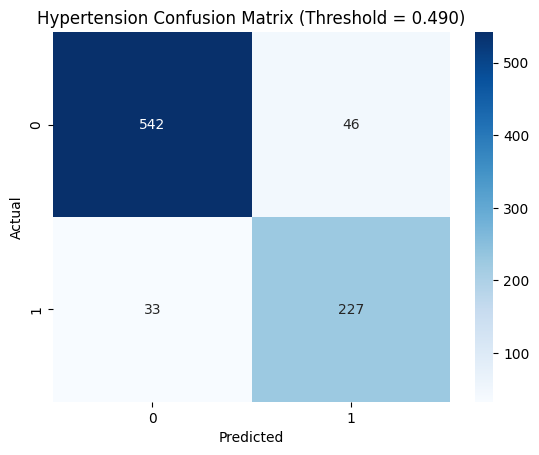

In [69]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## ------------------ HYPERTENSION MODEL (StackingClassifier) ------------------
rf_calibrated = CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=200, class_weight={0: 1, 1: 2.5}, random_state=42), method='sigmoid', cv=3)
lgb_calibrated = CalibratedClassifierCV(estimator=LGBMClassifier(n_estimators=300, learning_rate=0.03, class_weight={0: 1, 1: 2.5}, random_state=42), method='sigmoid', cv=3)
xgb_calibrated = CalibratedClassifierCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss',
    n_estimators=300, max_depth=5, learning_rate=0.03, min_child_weight=3, subsample=0.9, colsample_bytree=0.9,
    scale_pos_weight=(y_train_hyp == 0).sum() / (y_train_hyp == 1).sum() * 1.5, random_state=42), method='sigmoid', cv=3)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_calibrated), ('lgb', lgb_calibrated), ('xgb', xgb_calibrated)],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=3, n_jobs=-1
)

stacking_model.fit(X_train_hyp_sel, y_train_hyp)
# Get predicted probabilities
y_pred_proba_hyp = stacking_model.predict_proba(X_test_hyp_sel)[:, 1]

# Define thresholds to test (0.45 to 0.75 in steps of 0.01)
thresholds = np.linspace(0.45, 0.75, 31)  # 31 points between 0.45 and 0.75 (inclusive)

# Initialize variables to track best threshold and metrics
best_threshold_hyp = 0.45
best_f1 = 0
best_recall = 0
best_precision = 0
best_report = ""
best_cm = None

# Evaluate each threshold
for threshold in thresholds:
    y_pred_hyp = (y_pred_proba_hyp >= threshold).astype(int)
    
    # Calculate metrics
    current_f1 = f1_score(y_test_hyp, y_pred_hyp)
    current_recall = recall_score(y_test_hyp, y_pred_hyp)
    current_precision = precision_score(y_test_hyp, y_pred_hyp)
    
    # Optimize for F1-score (change this condition if needed)
    if current_f1 > best_f1:
        best_threshold_hyp = threshold
        best_f1 = current_f1
        best_recall = current_recall
        best_precision = current_precision
        best_report = classification_report(y_test_hyp, y_pred_hyp)
        best_cm = confusion_matrix(y_test_hyp, y_pred_hyp)

# Print and plot the best results
print(f"🏆 Best Threshold: {best_threshold_hyp:.3f}")
print(f"🔹 Best F1-score: {best_f1:.3f}")
print(f"🔹 Best Recall: {best_recall:.3f}")
print(f"🔹 Best Precision: {best_precision:.3f}")
print("\n📊 Best Hypertension Classification Report:")
print(best_report)

# Plot confusion matrix
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Hypertension Confusion Matrix (Threshold = {best_threshold_hyp:.3f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Diabetes Prediction

[LightGBM] [Info] Number of positive: 3300, number of negative: 3300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 6600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🏆 Best Threshold: 0.610
🔹 Best F1-score: 0.706
🔹 Best Recall: 0.750
🔹 Best Precision: 0.667

📊 Best Diabetes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       824
           1       0.67      0.75      0.71        24

    accuracy                           0.98       848
   macro avg       0.83      0.87      0.85       848
weighted avg       0.98      0.98      0.98       848



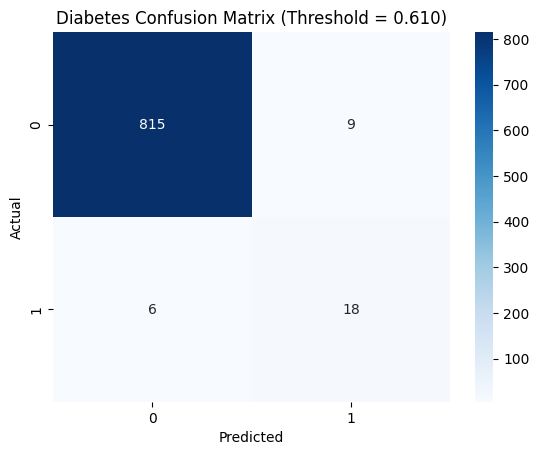

In [70]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

# ------------------ DIABETES MODEL (VotingClassifier) ------------------
voting_model_dia = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('lgb', LGBMClassifier(class_weight='balanced', random_state=42)),
    ('cat', CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=6,
                               class_weights=[1, 50], eval_metric='Recall', verbose=0))
], voting='soft')

voting_model_dia.fit(X_train_dia_res_sel, y_train_dia_res)

# Get predicted probabilities
y_pred_proba_dia = voting_model_dia.predict_proba(X_test_dia_sel)[:, 1]

# Define thresholds to test
thresholds = np.linspace(0.5, 0.75, 26)  # 26 points between 0.5 and 0.75 (inclusive)

# Initialize variables to track best threshold and metrics
best_threshold_dia = 0.5
best_f1 = 0
best_recall = 0
best_precision = 0
best_report = ""
best_cm = None

# Evaluate each threshold
for threshold in thresholds:
    y_pred_dia = (y_pred_proba_dia >= threshold).astype(int)
    
    # Calculate metrics
    current_f1 = f1_score(y_test_dia, y_pred_dia)
    current_recall = recall_score(y_test_dia, y_pred_dia)
    current_precision = precision_score(y_test_dia, y_pred_dia)
    
    # You can change this condition to optimize for different metrics
    # Here we're optimizing for F1-score, but you could use recall or a custom metric
    if current_f1 > best_f1:
        best_threshold_dia = threshold
        best_f1 = current_f1
        best_recall = current_recall
        best_precision = current_precision
        best_report = classification_report(y_test_dia, y_pred_dia)
        best_cm = confusion_matrix(y_test_dia, y_pred_dia)

# Print and plot the best results
print(f"🏆 Best Threshold: {best_threshold_dia:.3f}")
print(f"🔹 Best F1-score: {best_f1:.3f}")
print(f"🔹 Best Recall: {best_recall:.3f}")
print(f"🔹 Best Precision: {best_precision:.3f}")
print("\n📊 Best Diabetes Classification Report:")
print(best_report)

# Plot confusion matrix
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Diabetes Confusion Matrix (Threshold = {best_threshold_dia:.3f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving Models as pkl

In [71]:
import joblib

# Save the models
joblib.dump(voting_model_dia, 'model_diabetes.pkl')


['model_diabetes.pkl']

In [72]:
joblib.dump(stacking_model, 'model_hypertension.pkl')


['model_hypertension.pkl']

In [73]:
joblib.dump(preprocessor_hyp, 'scaler_hypertension.pkl')


['scaler_hypertension.pkl']

In [74]:
joblib.dump(preprocessor_dia, 'scaler_diabetes.pkl')

['scaler_diabetes.pkl']

In [75]:
joblib.dump(selector_hyp, 'selector_hypertension.pkl')


['selector_hypertension.pkl']

In [76]:
joblib.dump(selector_dia, 'selector_dia.pkl')

['selector_dia.pkl']

In [77]:
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'drop':
            continue
        if name == 'num':
            feature_names.extend(columns)
        elif name == 'cat':
            feature_names.extend(columns)
        else:
            # Some transformers may be pipelines; handle accordingly
            try:
                feature_names.extend(transformer.get_feature_names_out(columns))
            except:
                feature_names.extend(columns)
    return feature_names


In [78]:
# Hypertension
full_feature_names_hyp = get_feature_names(preprocessor_hyp)
selected_feature_names_hyp = [full_feature_names_hyp[i] for i in selector_hyp.get_support(indices=True)]
joblib.dump(selected_feature_names_hyp, "selected_hypertension_features.pkl")

c:\Users\CLARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


['selected_hypertension_features.pkl']

In [79]:
# Diabetes
full_feature_names_dia = get_feature_names(preprocessor_dia)
selected_feature_names_dia = [full_feature_names_dia[i] for i in selector_dia.get_support(indices=True)]
joblib.dump(selected_feature_names_dia, "selected_diabetes_features.pkl")


['selected_diabetes_features.pkl']

In [80]:
print("🔍 model_hypertension type:", type(stacking_model))


🔍 model_hypertension type: <class 'sklearn.ensemble._stacking.StackingClassifier'>
